# K-Means Clustering

It is an algorithm to group data into **K** clusters based on similarity (distance).

**The Algorithm:**
1.  **Initialize:** Pick $K$ random points as "Centroids".
2.  **Assign:** For every data point, find the nearest Centroid and join its team.
3.  **Update:** Move the Centroid to the exact center (mean) of its team.
4.  **Repeat:** Keep doing 2 & 3 until the Centroids stop moving.

## Create Data (The Blobs)
We'll generate synthetic data with distinct groups to see if the algorithm can "rediscover" them.

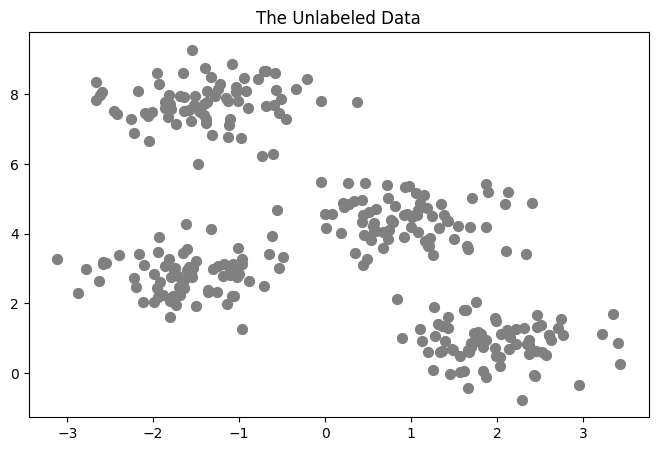

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate 300 samples with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=50, color='gray')
plt.title("The Unlabeled Data")
plt.show()

## Implementing K-Means
We can see 4 blobs with our eyes. Let's ask K-Means to find them.

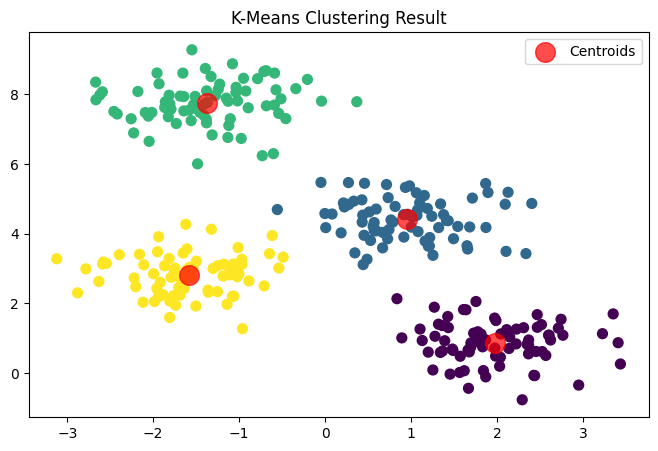

In [6]:
# Train K-Means
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the Clusters
plt.figure(figsize=(8, 5))
# Plot Points
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
# Plot Centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroids')
plt.title("K-Means Clustering Result")
plt.legend()
plt.show()

## The Problem: How do we choose K?
Here we knew $K=4$ because we made the data. In the real world, we don't know.

### The Elbow Method
We calculate the **Inertia** (Sum of Squared Distances from point to centroid). 
- As $K$ increases, Inertia *always* decreases (more centroids = closer matches).
- We look for the "Elbow" point where adding more clusters gives diminishing returns.

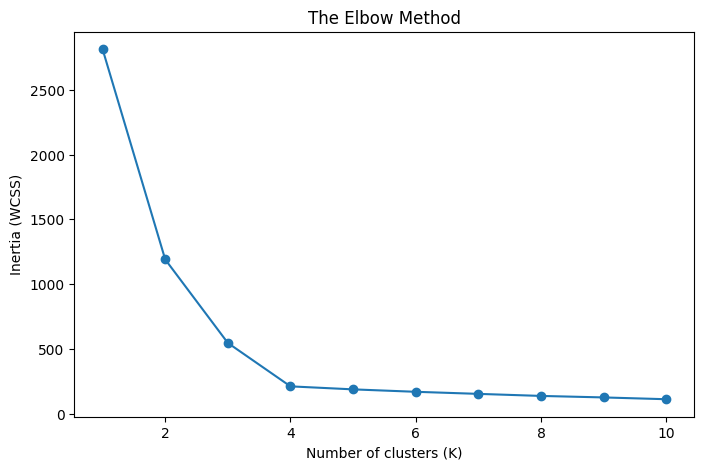

In [7]:
wcss = [] # Within-Cluster Sum of Squares (Inertia)

for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.show()

### Conclusion
Do you see the "Elbow" at **K=4**? That tells us that 4 is the optimal number of clusters for this dataset.

If we picked K=5, the inertia wouldn't drop much further. If we picked K=2, the inertia would be very high.

# Real World Example: Customer Segmentation

**The Dataset:** Mall Customers.

**The Goal:** Group customers based on their **Annual Income** and **Spending Score** (1-100) so the marketing team can target them effectively.

In [8]:
import urllib.request
import os

# Download Dataset
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
save_path = "Mall_Customers.csv"

if not os.path.exists(save_path):
    urllib.request.urlretrieve(url, save_path)

df = pd.read_csv(save_path)
print(df.head())

# We only need 2 features for visualization: Income & Spending Score
X_mall = df.iloc[:, [3, 4]].values

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


### Step 1: Find optimal K (Elbow Method)
How many customer segments should we have? 3? 5? 10? Let the data tell us.

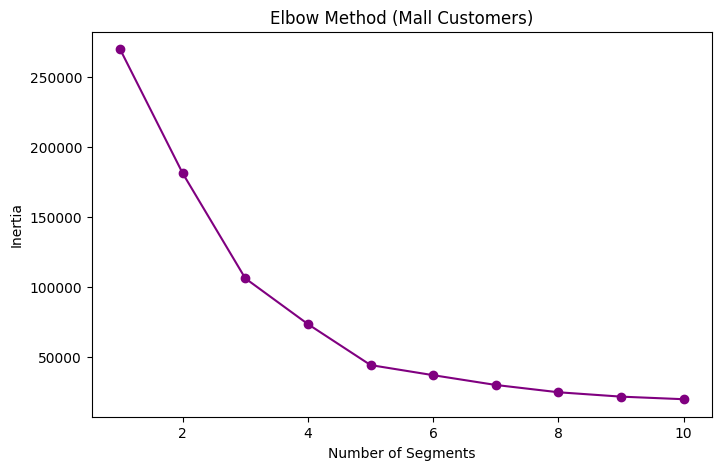

In [9]:
wcss_mall = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    km.fit(X_mall)
    wcss_mall.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_mall, marker='o', color='purple')
plt.title('Elbow Method (Mall Customers)')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.show()

### Step 2: Build the Clusters
The Elbow appears around **K=5**. Let's assume there are 5 types of customers.

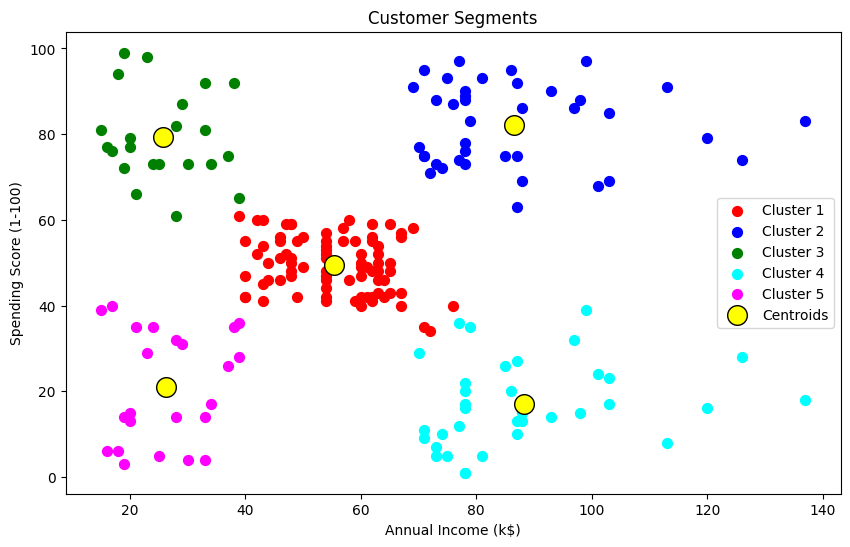

In [10]:
kmeans_mall = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
y_mall = kmeans_mall.fit_predict(X_mall)

# Visualizing the Segments
plt.figure(figsize=(10, 6))

# Plot clusters individually to label them
plt.scatter(X_mall[y_mall == 0, 0], X_mall[y_mall == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_mall[y_mall == 1, 0], X_mall[y_mall == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_mall[y_mall == 2, 0], X_mall[y_mall == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X_mall[y_mall == 3, 0], X_mall[y_mall == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X_mall[y_mall == 4, 0], X_mall[y_mall == 4, 1], s=50, c='magenta', label='Cluster 5')

# Plot Centroids
plt.scatter(kmeans_mall.cluster_centers_[:, 0], kmeans_mall.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids', edgecolor='black')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Interpretation
Look at the 5 groups!
1.  **Low Income, Low Spend:** Sensible savers.
2.  **Low Income, High Spend:** Careless spenders?
3.  **High Income, Low Spend:** Misers / Saving for big goals?
4.  **High Income, High Spend:** **TARGET CUSTOMERS** (The VIPs).
5.  **Average:** The middle class.

This is exactly how businesses define marketing strategies.